# Assignment: PCA Implementation

#### **Objective:**
#### The objective of this assignment is to implement PCA on a given dataset and analyse the results.

#### **Instructions:**
- Download the wine dataset from the UCI Machine Learning Repository: (https://archive.ics.uci.edu/ml/datasets/Wine).
- Load the dataset into a Pandas dataframe.
- Split the dataset into features and target variables.
- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
- Implement PCA on the preprocessed dataset using the scikit-learn library.
- Determine the optimal number of principal components to retain based on the explained variance ratio.
- Visualise the results of PCA using a scatter plot.
- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
- Interpret the results of PCA and clustering analysis.

#### **Deliverables:**
- Jupyter notebook containing the code for the PCA implementation.
- A report summarising the results of PCA and clustering analysis.
- Scatter plot showing the results of PCA.
- A table showing the performance metrics for the clustering algorithm.

#### **Additional Information:**
- You can use the python programming language.
- You can use any other machine learning libraries or tools as necessary.
- You can use any visualisation libraries or tools as necessary.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [57]:
headings = ['type', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 
 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 
 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

In [3]:
df = pd.read_csv("wine.data", header = None, names=headings)

In [4]:
df.head()

,type,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   type                          178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

In [6]:
df.isnull().sum()

type                            0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [7]:
df.describe()

,type,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [25]:
X = df.drop('type', axis=1)
y = df[['type']]

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [48]:
explained_variance = pca.explained_variance_ratio_

In [49]:
cumulative_explained_variance = np.cumsum(explained_variance)

In [50]:
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

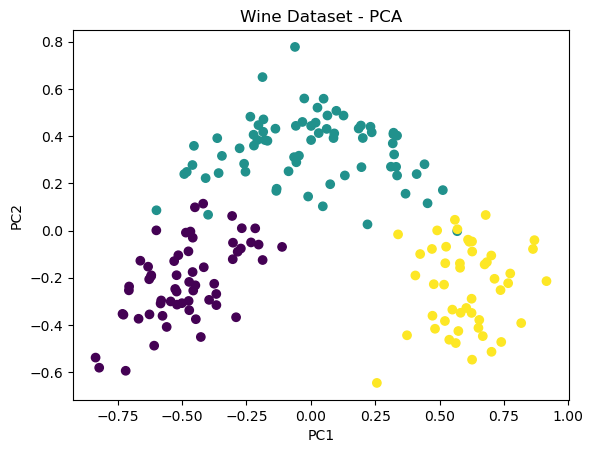

In [51]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.to_numpy(), cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Wine Dataset - PCA')
plt.show()

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca[:, :num_components])
y_kmeans = kmeans.predict(X_pca[:, :num_components])

In [53]:
silhouette_avg = silhouette_score(X_pca[:, :num_components], y_kmeans)

In [54]:
print(f"\nNumber of clusters: {kmeans.n_clusters}")


Number of clusters: 3


In [55]:
print(f"Silhouette score: {silhouette_avg:.4f}")

Silhouette score: 0.3120


## REPORT

- From the PCA scatter plot, we can see that the three classes are partially separated, but there is significant overlap between the clusters. 

- The silhouette score of 0.31 indicates that the clustering is moderately good.

- Clustering was performed on the PCA-transformed data using the K-Means algorithm with k=3.

In [61]:
table = pd.DataFrame({
    'Number of Clusters': [kmeans.n_clusters],
    'Silhouette Score': [silhouette_avg]
})
print(table,"\n")

   Number of Clusters  Silhouette Score
0                   3          0.311972 

